<a href="https://colab.research.google.com/github/yavuzkuk/Mnist-Dataset/blob/main/Mnist_Alexnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
from keras.datasets import mnist
from keras.layers import Dense,MaxPooling2D,Conv2D,Dropout,BatchNormalization,Rescaling
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers.reshaping.flatten import Flatten

In [64]:
(train_img,train_label),(test_img,test_label) = mnist.load_data()

In [65]:
train_img = train_img/255.0
test_img = test_img/255.0

In [66]:
test_label = to_categorical(test_label)
train_label = to_categorical(train_label)

train_img = train_img.reshape(train_img.shape[0],28,28,1)
test_img = test_img.reshape(test_img.shape[0],28,28,1)

In [67]:
model = Sequential()


model.add(Conv2D(96,kernel_size=(11,11),strides=(4,4),activation="relu",input_shape=(28,28,1)))

model.add(MaxPooling2D(pool_size=(3, 3), strides= (2, 2)))
model.add(Conv2D(256,kernel_size=(5,5),strides=(1,1),activation="relu",padding="same"))

model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(384,kernel_size=(3,3),strides=(1,1),activation="relu",padding="same"))

model.add(Conv2D(384,kernel_size=(3,3),strides=(1,1),activation="relu",padding="same"))

model.add(Conv2D(256,kernel_size=(3,3),strides=(1,1),activation="relu",padding="same"))

model.add(MaxPooling2D(pool_size=(1, 1), strides=(2, 2)))

model.add(Flatten())

model.add(Dense(4096,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10,activation="softmax"))

In [70]:
model.compile(metrics=["accuracy"],loss="categorical_crossentropy",optimizer="adam")

In [71]:
history = model.fit(train_img,train_label,epochs=10,batch_size=128,validation_data=(test_img,test_label))

Epoch 1/10
469/469 [==============================] - 563s 1s/step - loss: 0.7394 - accuracy: 0.7206 - val_loss: 0.1494 - val_accuracy: 0.9598
Epoch 2/10
469/469 [==============================] - 566s 1s/step - loss: 0.1363 - accuracy: 0.9615 - val_loss: 0.1004 - val_accuracy: 0.9717
Epoch 3/10
469/469 [==============================] - 572s 1s/step - loss: 0.0908 - accuracy: 0.9738 - val_loss: 0.0908 - val_accuracy: 0.9742
Epoch 4/10
469/469 [==============================] - 585s 1s/step - loss: 0.0726 - accuracy: 0.9791 - val_loss: 0.0720 - val_accuracy: 0.9798
Epoch 5/10
469/469 [==============================] - 567s 1s/step - loss: 0.0577 - accuracy: 0.9835 - val_loss: 0.0739 - val_accuracy: 0.9793
Epoch 6/10
469/469 [==============================] - 556s 1s/step - loss: 0.0496 - accuracy: 0.9855 - val_loss: 0.0983 - val_accuracy: 0.9736
Epoch 7/10
469/469 [==============================] - 556s 1s/step - loss: 0.0437 - accuracy: 0.9874 - val_loss: 0.0888 - val_accuracy: 0.9767

In [73]:
loss,accuracy = model.evaluate(test_img,test_label)

313/313 [==============================] - 8s 24ms/step - loss: 0.0657 - accuracy: 0.9836


In [82]:
loss = history.history["loss"]
accuracy = history.history["accuracy"]

In [85]:
len(loss)

10

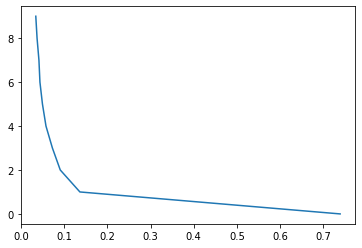

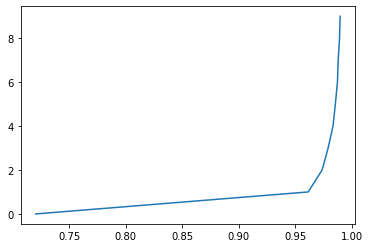

In [89]:
import matplotlib.pyplot as plt
epoch = range(11)

plt.plot(loss,range(len(loss)))
plt.show()

plt.plot(accuracy,range(len(accuracy)))
plt.show()